In [1]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D

In [7]:
def make_model(num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(units=1024,activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(units=512,activation='relu'))
    model.add(Dense(units=num_classes,activation='softmax'))
    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [8]:
now_model = make_model(y_test.shape[1])

In [9]:
history = now_model.fit(x_test,y_test,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 34s - loss: 2.3019 - acc: 0.0997 - val_loss: 2.3009 - val_acc: 0.1202
Epoch 2/20
10000/10000 [==============================] - 28s - loss: 2.2971 - acc: 0.1152 - val_loss: 2.2937 - val_acc: 0.1802
Epoch 3/20
10000/10000 [==============================] - 28s - loss: 2.2668 - acc: 0.1352 - val_loss: 2.2297 - val_acc: 0.2233
Epoch 4/20
10000/10000 [==============================] - 28s - loss: 2.1532 - acc: 0.2042 - val_loss: 2.1847 - val_acc: 0.2006
Epoch 5/20
10000/10000 [==============================] - 28s - loss: 2.0693 - acc: 0.2380 - val_loss: 2.0186 - val_acc: 0.2596
Epoch 6/20
10000/10000 [==============================] - 28s - loss: 2.0243 - acc: 0.2552 - val_loss: 2.0285 - val_acc: 0.2602
Epoch 7/20
10000/10000 [==============================] - 28s - loss: 1.9850 - acc: 0.2751 - val_loss: 1.9667 - val_acc: 0.2726
Epoch 8/20
10000/10000 [==============================

In [10]:
scores = now_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 46.68%


In [11]:
import cv2
x = np.array([cv2.imread('dog4.png')])
result = now_model.predict(x)
np.argmax(result,axis=1)

array([1], dtype=int64)

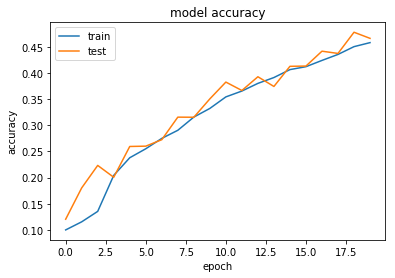

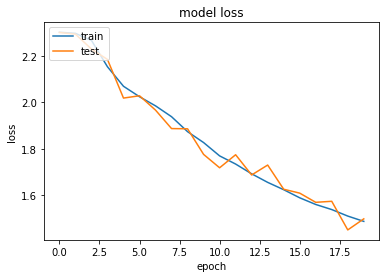

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()